<a href="https://colab.research.google.com/github/Shubhi3199/Dog-Breed-Identification/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end deep learning model to classify the breed of the dog

## 1. Problem
  The task is to classify a dog image with the correct breed using    deeplearning/ transferlearning 

## 2. Data
  The data is collected from a kaggle competition of predicting the right breed 
  of a dog
  the data consists of:
  * Training Set of `10k+` labeled sample images
  * Test Set of `10k+` images whose label is to be predicted

## 3. Features
  Unstructured data with 120 classifications

## 4. Evaluation
  We need to evaluate the prediction probabilites of our model to classify
  a given dog image with a particular breed label with some accuracy.

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
print(tf.__version__)
print(hub.__version__)
print('GPU available!!' if tf.config.list_physical_devices('GPU') else 'NO GPU available')

2.2.0-rc1
0.7.0
GPU available!!


In [0]:
 !unzip 'drive/My Drive/Dog Vision/dog-breed-identification.zip' -d 'drive/My Drive/Dog Vision/'

Streaming output truncated to the last 5000 lines.
  inflating: drive/My Drive/Dog Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/My Drive/Dog Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/My Drive/Dog Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/My Drive/Dog Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/My Drive/Dog Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/My Drive/Dog Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/My Drive/Dog Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/My Drive/Dog Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/My Drive/Dog Vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/My Drive/Dog Vision/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/My Drive/Dog Vision/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: drive/My Dri

## Getting our Data ready (Turning into Tensors)

It's imoprtant to turn the image data into numeric matrices(tensors).

In [3]:
labels_csv = pd.read_csv('/content/drive/My Drive/Dog Vision/labels.csv')
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [4]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


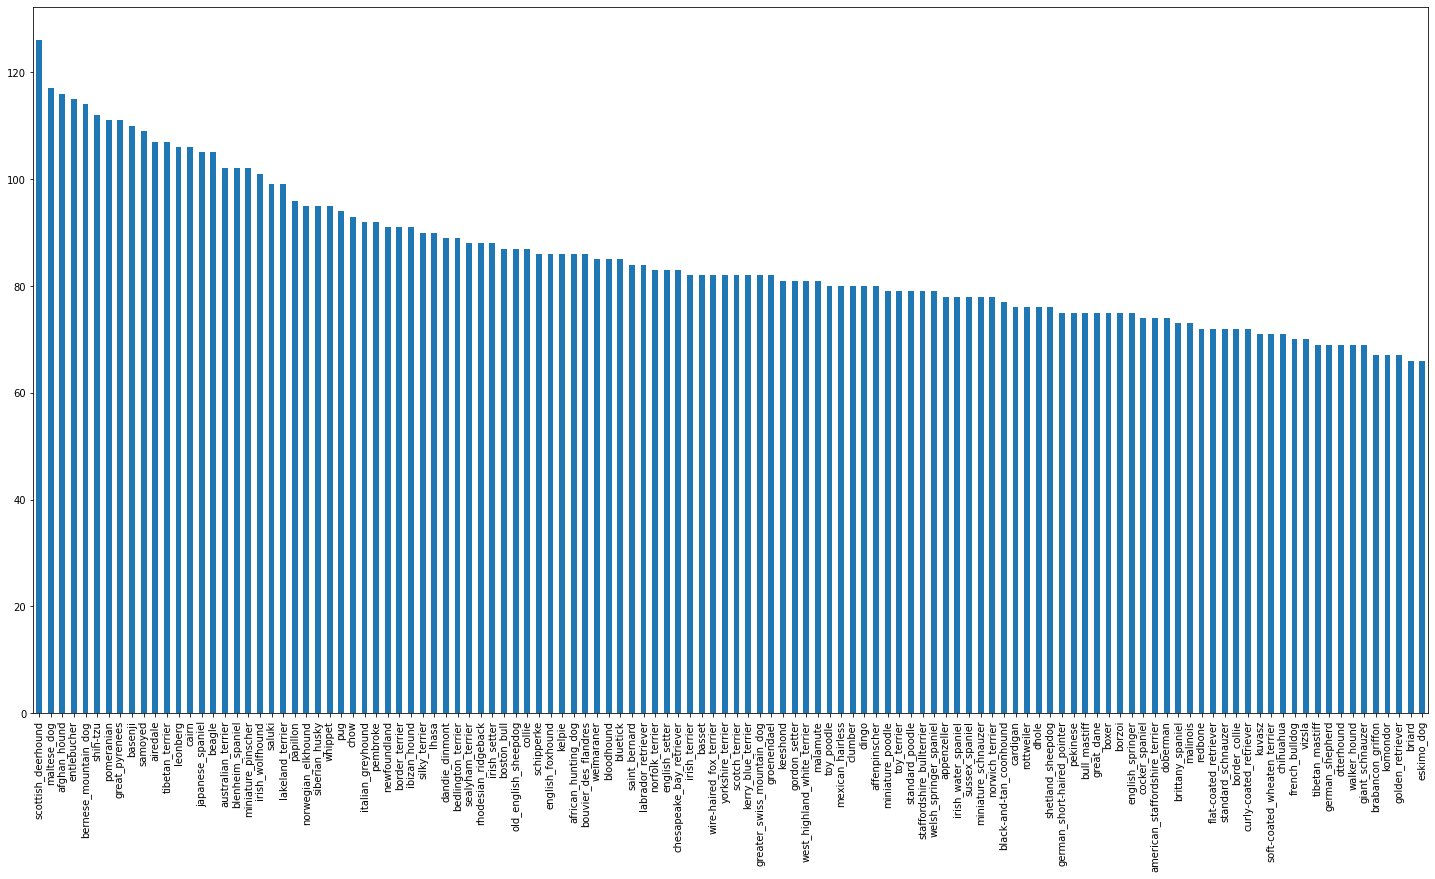

In [5]:
labels_csv['breed'].value_counts().plot.bar(figsize = (25, 13))

In [6]:
labels_csv['breed'].value_counts().median()

82.0

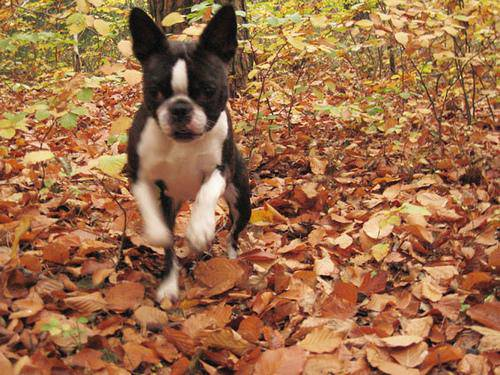

In [8]:
# Let's view an image
from IPython.display import Image
Image('/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [9]:
# Let's get a list of filename of our images
file_names = ['/content/drive/My Drive/Dog Vision/train/' + fname  for fname in labels_csv['id']+ '.jpg' ]
file_names[:10]

['/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check if the no. of image files in the training set matches with the no. of labels given
import os
if len(os.listdir('/content/drive/My Drive/Dog Vision/train')) == len(file_names):
  print('Yes! the number of images match with the labels given!')
else:
  print(':( pls check again')

Yes! the number of images match with the labels given!


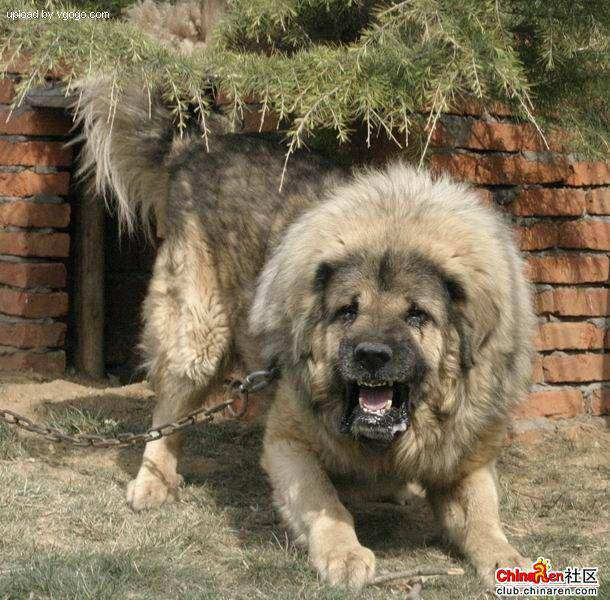

In [15]:
Image(file_names[9000])

In [18]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels, len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [17]:
if len(labels) == len(file_names):
  print('YES! the number of labels matches the number of files (images)')
else: print('Oh crap!')

YES! the number of labels matches the number of files (images)


In [38]:
 # Finding the unique labels
 unique_breeds = np.unique(labels)
 unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [24]:
 labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [29]:
# Turn every label into a boolean array, by comparing each label with unique_breed label
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [31]:
# because there were 10222 labels and 120 unique_breeds labels
np.array(boolean_labels).shape

(10222, 120)

In [41]:
# Turning Boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
